In [23]:
# List of all products
# List of orders, where each sublist contains the products ordered in that order
from all_products import all_products
from orders import orders

# Determine the number of rows and columns for the incidence matrix
rows = len(orders)
cols = len(all_products)


# Initialize the incidence matrix with all elements set to 0
INC = [[0 for _ in range(cols)] for _ in range(rows)]


# Populate the incidence matrix based on the products ordered in each order
for i, order in enumerate(orders):
    for product in order:
        col_index = all_products.index(product)
        INC[i][col_index] = 1


# Print the resulting incidence matrix
for row in INC:
    print(row)


[1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

JACCARD SIMILARITY - CHARACTERISTICS

In [36]:
from collections import defaultdict
from all_products import all_products


def jaccard_similarity(set1, set2):
    intersection = len(set1.intersection(set2))
    union = len(set1.union(set2))
    return intersection / union if union != 0 else 0


def build_similarity_matrix(data):
    similarity_matrix = defaultdict(dict)


    # Tạo tập hợp các sản phẩm dựa trên định dạng
    product_sets = defaultdict(set)
    for item in data:
        customer_id = item[:4]
        year = item[5]
        quality_code = item[7]
        product_code = item[9:]
        product_sets[customer_id, year, quality_code].add(product_code)


    # Tính toán similarity index và xây dựng similarity matrix
    products = list(product_sets.keys())
    for i in range(len(products)):
        for j in range(i, len(products)):
            product1 = products[i]
            product2 = products[j]
            similarity = jaccard_similarity(product_sets[product1], product_sets[product2])
            similarity_matrix[product1][product2] = similarity
            similarity_matrix[product2][product1] = similarity


    return similarity_matrix

# Xây dựng similarity matrix
similarity_matrix = build_similarity_matrix(all_products)


# In similarity matrix
for key, value in similarity_matrix.items():
    print(key)
    for key2, value2 in value.items():
        print('    ',key2,':',value2)


('0702', 'S', '1')
     ('0702', 'S', '1') : 1.0
     ('0702', 'T', '1') : 0.3333333333333333
     ('0702', 'S', '2') : 0.2
     ('0702', 'S', '4') : 0.0
     ('0702', 'T', '5') : 0.0
     ('K723', 'S', '0') : 0.0
     ('K723', 'S', '8') : 0.0
     ('K725', 'S', '4') : 0.3333333333333333
     ('0809', 'S', '0') : 0.0
     ('K809', 'S', '8') : 0.0
     ('0814', 'S', '6') : 0.3333333333333333
     ('0814', 'S', '3') : 0.0
     ('0814', 'S', '4') : 0.25
     ('0814', 'S', '2') : 0.0
     ('0835', 'S', '0') : 0.0
     ('K346', ' ', '1') : 0.0
     ('3463', 'S', '8') : 0.0
     ('K363', ' ', '1') : 0.0
     ('3668', 'S', '1') : 0.0
     ('4002', 'S', '8') : 0.3333333333333333
     ('4082', 'S', '0') : 0.0
     ('4082', 'T', '0') : 0.0
     ('4090', 'S', '0') : 0.0
     ('4090', 'S', '4') : 0.0
     ('4126', 'S', '0') : 0.0
     ('4126', 'S', '2') : 0.3333333333333333
     ('4126', 'T', '8') : 0.0
     ('G723', 'S', '0') : 0.0
     ('G737', 'S', '0') : 0.0
     ('G737', 'S', '3') : 0.0
     

EUCLIDEAN DISTANCE - PRICE

In [ ]:
import numpy as np
from all_products_2 import all_products_2

# We will use the Euclidean method to calculate distance
# between two prices of each pair of products
# Next, we need to scale the distance from 0 -> 1 for easily visualization

min_possible_distance = 0
max_possible_distance = max(all_products_2.values()) - min(all_products_2.values())

# Phân tách tên sản phẩm và giá trị
products = list(all_products_2.keys())
prices = list(all_products_2.values())

n = len(prices)

# Tạo ma trận tương đồng
similarity_matrix = [[0] * n for _ in range(n)]



for i in range(n):
    for j in range(i+1, n):
        price1 = prices[i]
        price2 = prices[j]

        # Tính toán khoảng cách Euclidean
        distance = np.abs(price2-price1)
        
        # Chuẩn hoá khoảng cách và lấy 2 chữ số thập phân sau dấu phẩy
        similarity_point = 1 - format(distance / max_possible_distance, '.2f')
        
        
        # Và gán tương đồng vào ma trận
        similarity_matrix[i][j] = similarity_point
        similarity_matrix[j][i] = similarity_point

# In ma trận tương đồng
print("Similarity Matrix:")
for i in range(n):
    for j in range(n):
        if j > i:
            product1 = products[i]
            product2 = products[j]
            similarity = similarity_matrix[i][j]
            print(f"{product1} - {product2}: {similarity}")

RUN ABC CLASSIFICATION BASED ON DEMAND & CLUSTERING BASED ON DEMAND AND CHARACTERISTIC

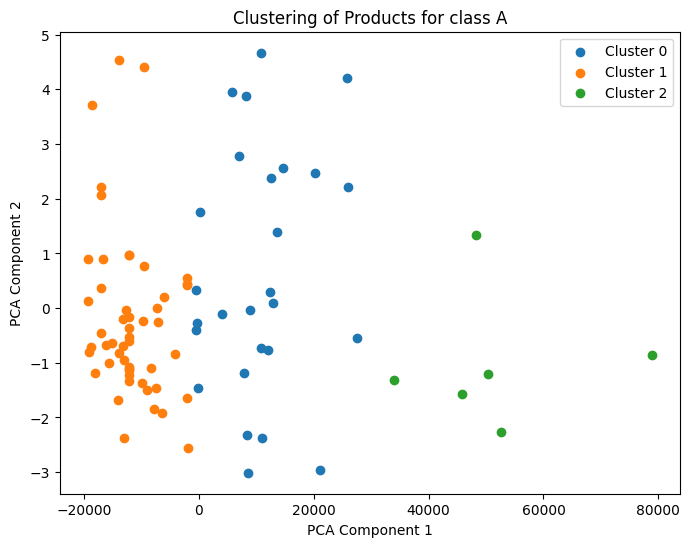

Clustering results for class A:
Sản phẩm 0702 S5445 (demand 45751.26) thuộc cluster 0
Sản phẩm 0809 S1004 (demand 80319.0) thuộc cluster 2
Sản phẩm 0809 S1004 (demand 44686.0) thuộc cluster 0
Sản phẩm K809 S4820 (demand 110932.0) thuộc cluster 2
Sản phẩm 0814 S5395 (demand 82425.0) thuộc cluster 2
Sản phẩm 0814 S5395 (demand 59623.0) thuộc cluster 0
Sản phẩm 0814 S5496 (demand 22506.0) thuộc cluster 1
Sản phẩm 0814 S1215 (demand 84720.0) thuộc cluster 2
Sản phẩm 0814 S3448 (demand 40998.0) thuộc cluster 0
Sản phẩm 0835 S1004 (demand 32358.0) thuộc cluster 0
Sản phẩm 4082 T1002 (demand 15067.5) thuộc cluster 1
Sản phẩm 4126 S1243 (demand 15882.0) thuộc cluster 1
Sản phẩm G737 S4820 (demand 31574.0) thuộc cluster 0
Sản phẩm G737 S4820 (demand 12796.0) thuộc cluster 1
Sản phẩm 0000 S4877 (demand 58021.0) thuộc cluster 0
Sản phẩm 0000 S4877 (demand 38993.0) thuộc cluster 0
Sản phẩm 0000 S4900 (demand 57897.0) thuộc cluster 0
Sản phẩm 0000 R4928 (demand 52357.3) thuộc cluster 0
Sản phẩm 000

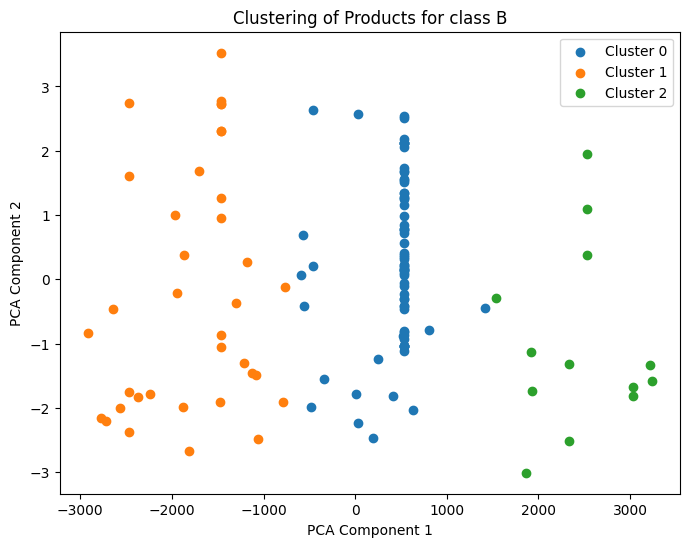

Clustering results for class B:
Sản phẩm 0702 S5251 (demand 8336.6) thuộc cluster 1
Sản phẩm 0702 S5401 (demand 8986.0) thuộc cluster 0
Sản phẩm 0702 T5524 (demand 9710.0) thuộc cluster 0
Sản phẩm 0814 S5395 (demand 10884.0) thuộc cluster 0
Sản phẩm 4082 S1002 (demand 9123.0) thuộc cluster 0
Sản phẩm G737 S1004 (demand 11388.0) thuộc cluster 2
Sản phẩm G737 S1332 (demand 7764.5) thuộc cluster 1
Sản phẩm 0000 S4877 (demand 7225.0) thuộc cluster 1
Sản phẩm 0000 S4900 (demand 11329.0) thuộc cluster 2
Sản phẩm 0000 S4900 (demand 7651.0) thuộc cluster 1
Sản phẩm 0000 S5398 (demand 11796.3) thuộc cluster 2
Sản phẩm 1137 Q1004 (demand 9873.1) thuộc cluster 0
Sản phẩm 1137 S1243 (demand 8871.8) thuộc cluster 0
Sản phẩm 1137 S2821 (demand 8910.8) thuộc cluster 0
Sản phẩm 1137 S5458 (demand 7518.2) thuộc cluster 1
Sản phẩm 1137 S5501 (demand 12497.0) thuộc cluster 2
Sản phẩm 1137 S5515 (demand 12680.8) thuộc cluster 2
Sản phẩm 1137 S1002 (demand 8379.0) thuộc cluster 1
Sản phẩm 1137 S1098 (deman

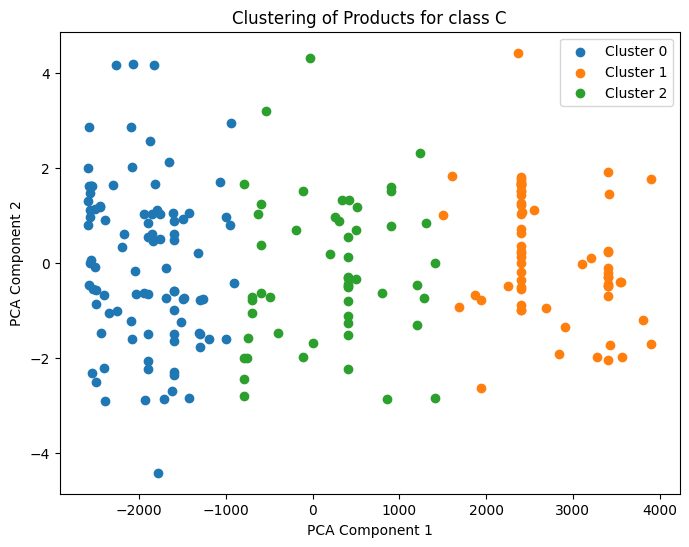

Clustering results for class C:
Sản phẩm 0702 S5183 (demand 2848.5) thuộc cluster 2
Sản phẩm 0702 S5183 (demand 5144.0) thuộc cluster 1
Sản phẩm 0702 S5183 (demand 10.0) thuộc cluster 0
Sản phẩm 0702 T5183 (demand 1648.0) thuộc cluster 0
Sản phẩm 0702 S5196 (demand 3111.0) thuộc cluster 2
Sản phẩm 0702 S5196 (demand 651.0) thuộc cluster 0
Sản phẩm 0702 S5197 (demand 981.8) thuộc cluster 0
Sản phẩm 0702 S5237 (demand 1526.4) thuộc cluster 0
Sản phẩm 0702 S5237 (demand 54.0) thuộc cluster 0
Sản phẩm 0702 S5237 (demand 300.0) thuộc cluster 0
Sản phẩm 0702 S5237 (demand 38.4) thuộc cluster 0
Sản phẩm 0702 S5237 (demand 782.1) thuộc cluster 0
Sản phẩm 0702 S5237 (demand 45.0) thuộc cluster 0
Sản phẩm 0702 S5239 (demand 20.0) thuộc cluster 0
Sản phẩm 0702 S5445 (demand 512.0) thuộc cluster 0
Sản phẩm 0702 S5445 (demand 11.0) thuộc cluster 0
Sản phẩm K723 S1004 (demand 1169.5) thuộc cluster 0
Sản phẩm K723 S4821 (demand 20.0) thuộc cluster 0
Sản phẩm K725 S2403 (demand 25.0) thuộc cluster 0
S

In [41]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from all_products import all_products
from all_product_demands import demands

# Calculate demand quantiles for ABC classification
demand_quantiles = np.percentile(demands, [50, 80])

# Assign ABC classes based on demand
classes = []
for demand in demands:
    if demand <= demand_quantiles[0]:
        classes.append('C')
    elif demand <= demand_quantiles[1]:
        classes.append('B')
    else:
        classes.append('A')

# Encode classes
label_encoder = LabelEncoder()
encoded_classes = label_encoder.fit_transform(classes)

# Create dictionaries to store clustering results for each class
class_results = {'A': [], 'B': [], 'C': []}

# Tạo một đối tượng CountVectorizer để mã hoá các sản phẩm thành vector số học
vectorizer = CountVectorizer(analyzer='char', ngram_range=(1, 1))
X_text = vectorizer.fit_transform(all_products)

# Chuyển đổi ma trận sparse thành mảng numpy
X_text = X_text.toarray()

# Chuyển đổi classes thành numpy array
X_classes = np.array(encoded_classes).reshape(-1, 1)
X_demands = np.array(demands).reshape(-1, 1)

# Kết hợp các features lại với nhau
X = np.hstack((X_text, X_classes, X_demands))

# Số lượng cluster bạn muốn tạo
num_clusters = 3

# Perform clustering and draw charts for each class separately
for class_label in np.unique(encoded_classes):
    class_indices = np.where(encoded_classes == class_label)[0]
    X_class = X[class_indices]

    # Áp dụng thuật toán K-means
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(X_class)

    for i, label in zip(class_indices, kmeans.labels_):
        class_results[label_encoder.inverse_transform([class_label])[0]].append((all_products[i], demands[i], label))

    # Reduce the dimensionality of the feature space to 2 dimensions using PCA
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_class)
    
    # Plot the clusters
    plt.figure(figsize=(8, 6))
    for i in range(num_clusters):
        plt.scatter(X_pca[kmeans.labels_ == i, 0], X_pca[kmeans.labels_ == i, 1], label=f'Cluster {i}')
    plt.title(f'Clustering of Products for class {label_encoder.inverse_transform([class_label])[0]}')
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.legend()
    plt.show()

    # Print clustering results for each product within the class
    print(f"Clustering results for class {label_encoder.inverse_transform([class_label])[0]}:")
    for i, label in zip(class_indices, kmeans.labels_):
        print(f"Sản phẩm {all_products[i]} (demand {demands[i]}) thuộc cluster {label}")
        
    
# Return results for each class
for class_label, results in class_results.items():
    print(f"Results for class {class_label}:")
    for product_name, demand, cluster_label in results:
        print(f"Product: {product_name}, Demand: {demand}, Cluster: {cluster_label}")
    
dataframes = {}

for key, value in class_results.items():
    dataframes[key] = pd.DataFrame(value, columns=['Code', 'Amount', 'Status'])

print(dataframes['A'])  # Print dataframe for group A
print(dataframes['B'])  # Print dataframe for group B
print(dataframes['C'])  # Print dataframe for group C


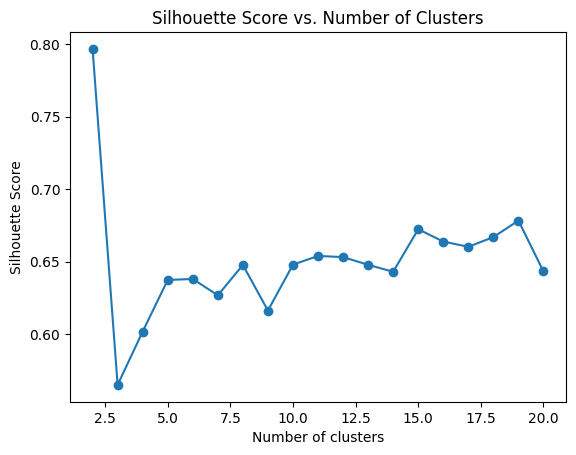

In [34]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np

cluster_range = range(2, 21)
silhouette_scores = []

# Calculate silhouette score for each cluster number
for num_clusters in cluster_range:
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(X)
    silhouette_scores.append(silhouette_score(X, kmeans.labels_))

# Plot silhouette scores
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters')
plt.show()

In [2]:
!pip3 install pulp

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.7/17.7 MB 1.9 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python3.11 -m pip install --upgrade pip


RUN LP MODEL TO ARRANGE PRODUCT
1. Initialize all variables and packages

In [42]:
import pulp

In [43]:
rsj = [1, 2, 3]
djl = [
        [0, 2, 4],
        [2, 0, 3],
        [4, 3, 0]
    ]
Q = 3
P = 3
Si = [1, 1, 1]
ysik = [
        [0.5, 0.3, 0.7],
        [0.6, 0.4, 0.8],
        [0.7, 0.5, 0.9]
    ]
fi = [10, 15, 20]
ywik = [
        [0.8, 0.6, 0.9],
        [0.7, 0.5, 0.8],
        [0.9, 0.7, 1.0]
    ]

ycik = [
        [0.8, 0.6, 0.9],
        [0.7, 0.5, 0.8],
        [0.9, 0.7, 1.0]
    ]
    
optimal_solution_found = False

2. Initialize matrix to store data

In [44]:
x = []
for i in range(Q):
    x.append([])
    for j in range(P):
        x[i].append(0)    # Assign to all value is 0

3. Declare LP model

In [45]:
model = pulp.LpProblem("Storage_Location_Assignment", pulp.LpMinimize)

4. Continue ...

In [46]:
xij = {}
for i in range(Q):
    for j in range(P):
        xij[(i, j)] = pulp.LpVariable(f'x_{i}_{j}', 0, 1, pulp.LpBinary)

# Define auxiliary variables for the linearization
a = {}
for i in range(Q):
    for j in range(P):
        for k in range(Q):
            for l in range(P):
                a[(i, j, k, l)] = pulp.LpVariable(f'a_{i}_{j}_{k}_{l}', 0, 1, pulp.LpBinary)

In [47]:
objective = pulp.lpSum(
    fi[i] * rsj[j] * xij[(i, j)]
    for i in range(Q) for j in range(P)
)
for i in range(Q):
    for j in range(P):
        for k in range(Q):
            for l in range(P):
                objective += fi[i] * ysik[i][k] * ywik[i][k] * ycik[i][k] * djl[j][l] * a[(i, j, k, l)]

model.objective = objective

In [48]:
# Constraints
for i in range(Q):
    model += pulp.lpSum(xij[(i, j)] for j in range(P)) == Si[i]

for j in range(P):
    model += pulp.lpSum(xij[(i, j)] for i in range(Q)) == 1

model += pulp.lpSum(Si[i] for i in range(Q)) <= P

In [49]:
for i in range(Q):
    for j in range(P):
        for k in range(Q):
            for l in range(P):
                model += a[(i, j, k, l)] >= xij[(i, j)] + xij[(k, l)] - 1
                model += a[(i, j, k, l)] <= xij[(i, j)]
                model += a[(i, j, k, l)] <= xij[(k, l)]

In [50]:
model.solve()

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /usr/local/lib/python3.11/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/m3/6tn255y91wddfqjcpw36l1540000gn/T/f12d9b3bb56b4471939a2ce784ec419b-pulp.mps -timeMode elapsed -branch -printingOptions all -solution /var/folders/m3/6tn255y91wddfqjcpw36l1540000gn/T/f12d9b3bb56b4471939a2ce784ec419b-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 255 COLUMNS
At line 1075 RHS
At line 1326 BOUNDS
At line 1417 ENDATA
Problem MODEL has 250 rows, 90 columns and 576 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 85 - 0.00 seconds
Cgl0003I 36 fixed, 0 tightened bounds, 215 strengthened rows, 59 substitutions
Cgl0003I 0 fixed, 0 tightened bounds, 36 strengthened rows, 8 substitutions
Cgl0003I 0 fixed, 0 tightened bounds, 9 strengthened rows, 28 substitutions
Cgl0004I processed model has 39 rows, 15

1

In [51]:
if pulp.LpStatus[model.status] == "Optimal":
    optimal_solution_found = True
    for i in range(Q):
        for j in range(P):
            if pulp.value(xij[(i, j)]) == 1:
                x[i][j] = 1
else:
    optimal_solution_found = False

In [52]:
# Print each slot and the products assigned to it
if not optimal_solution_found:
    print("No optimal solution found")
else:
    for j in range(P):
        print(f"Slot {j + 1}: ", end="")
        for i in range(Q):
            if x[i][j] == 1:
                print(f"Product {i + 1}", end=" ")
        print()

Slot 1: Product 2 
Slot 2: Product 3 
Slot 3: Product 1 
